In [1]:
import sys
from numbers import Integral
from random import uniform
from PIL import Image as pil_image
import fastai
from fastai.vision import *
from fastai.vision import Image
from fastai.vision.transform import _minus_epsilon
from fastai.vision.data import SegmentationProcessor
from mask_functions import *
from collections import defaultdict
import cv2

In [8]:
tfms = get_transforms(max_rotate=25)
len(tfms)

2

In [13]:
def get_ex(): return open_image('images/cat_example.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

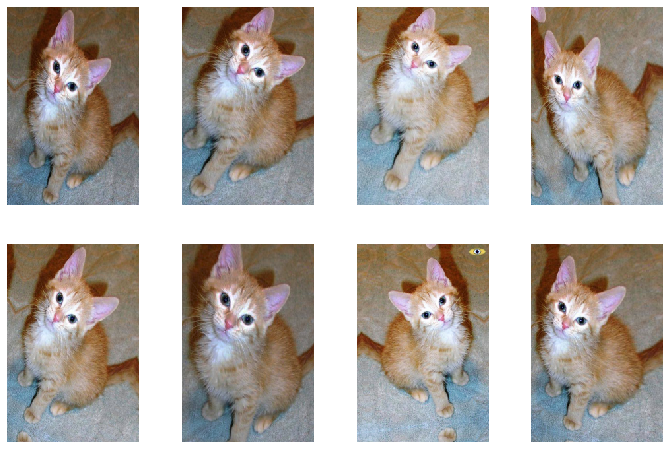

In [14]:
plots_f(2, 4, 12, 8, size=(300,200))

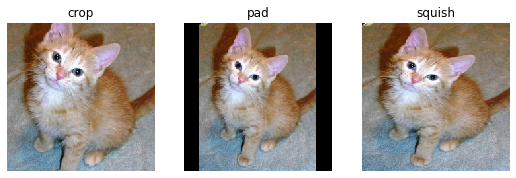

In [15]:
_,axs = plt.subplots(1,3,figsize=(9,3))
for rsz,ax in zip([ResizeMethod.CROP, ResizeMethod.PAD, ResizeMethod.SQUISH], axs):
    get_ex().apply_tfms([crop_pad()], size=224, resize_method=rsz, padding_mode='zeros').show(ax=ax, title=rsz.name.lower())

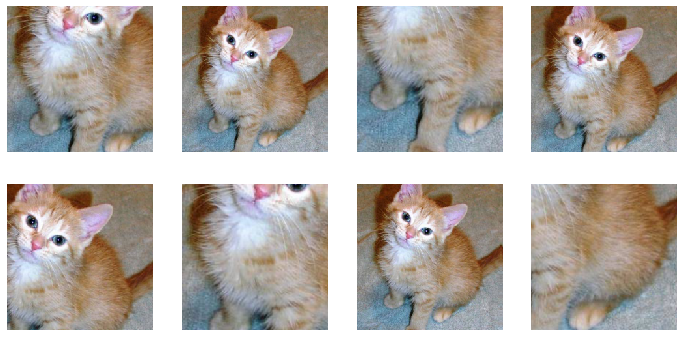

In [16]:
tfms = zoom_crop(scale=(0.75,2), do_rand=True)
plots_f(2, 4, 12, 6, size=224)

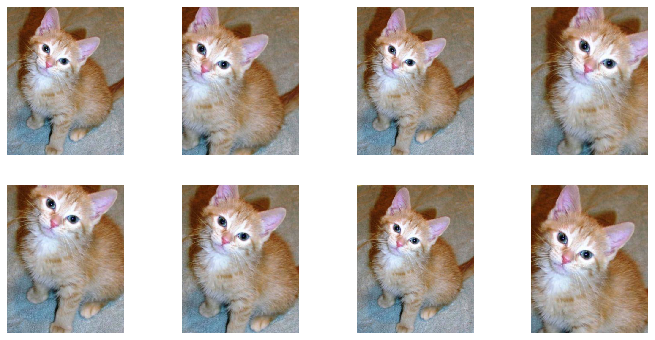

In [17]:
tfm = rand_zoom(scale=(1.,1.5))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm)
    img.show(ax=ax)